In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

from collections import Counter
from utils import *


In [2]:
def missed_alleles_per_ancestry(pre,gs):
    groupscsv = "../datasets/SraRunTableD2.txt"
    groups = pd.read_csv(groupscsv)
    
    inaccurate = []
    allresult = []

    for group, df_by_group in groups.groupby('Population'):
        accession_numbers = df_by_group['Run'].values.tolist()
        gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
        gs_final = gs_final.iloc[: ,:]
        

        ret = get_inaccurate_and_all_alleles(pre,gs_final)
        inaccurate.append(ret[0])
        allresult.append(ret[1])

    yoruba_inaccurate = inaccurate[4]
    yoruba_all = allresult[4]

    europe_inaccurate = sum_euro_groups(inaccurate[1:4])
    europe_all = sum_euro_groups(allresult[1:4])

    return [yoruba_inaccurate,yoruba_all], [europe_inaccurate,europe_all]

In [3]:
data = list()
tools=["hlaforest","optitype","phlat","seq2hla","rna2hla","arcas","hlavbseq","hlahd"]

yoruba_missed_alleles = []
yoruba_total_alleles = []
europe_missed_alleles = []
europe_total_alleles = []


for t in tools:
    gs=pd.read_csv("../datasets/2_gs.csv")
    pre=pd.read_csv("../results/standard/"+str(t)+"_d2.csv")
        
    ret = missed_alleles_per_ancestry(pre,gs)
    
    yoruba_missed_alleles.extend(ret[0][0])
    yoruba_total_alleles.extend(ret[0][1])
    europe_missed_alleles.extend(ret[1][0])
    europe_total_alleles.extend(ret[1][1])
    



In [4]:
y_missed = Counter(yoruba_missed_alleles)
y_all = Counter(yoruba_total_alleles)

df_y = []
for k in y_all.keys():
    try:
        df_y.append([k,y_all[k],y_missed[k], (y_missed[k]/y_all[k])])
    except:
        df_y.append([k,y_all[k],0,0])
        
df_y = pd.DataFrame(df_y,columns=['allele','all','missed','percentage'])
df_y = df_y.sort_values(by=['percentage'],ascending=False)
df_y = df_y[df_y.percentage != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
df_y

,allele,all,missed,percentage
88,DQB1*06:04,12,6,0.500000
39,DQB1*06:02,66,26,0.393939
31,DQB1*06:03,72,26,0.361111
65,DRB1*14:01,35,12,0.342857
21,DQB1*06:05,42,13,0.309524
...,...,...,...,...
14,C*08:02,56,1,0.017857
40,A*68:02,64,1,0.015625
72,C*02:02,64,1,0.015625
28,A*33:03,104,1,0.009615


In [7]:
e_missed = Counter(europe_missed_alleles)
e_all = Counter(europe_total_alleles)

df_e = []
for k in e_all.keys():
    try:
        df_e.append([k,e_all[k],e_missed[k], (e_missed[k]/e_all[k])])
    except:
        df_e.append([k,e_all[k],0,0])
        
df_e = pd.DataFrame(df_e,columns=['allele','all','missed','percentage'])
df_e = df_e.sort_values(by=['percentage'],ascending=False)
df_e = df_e.drop(index=[108]) # dropping 3 top rows, they hold na values
df_e = df_e[df_e.percentage != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
df_e

,allele,all,missed,percentage
129,DQB1*05:04,12,4,0.333333
121,DRB1*15:02,14,4,0.285714
132,DRB1*13:21,7,2,0.285714
24,DQB1*06:02,510,143,0.280392
9,DQB1*03:02,354,94,0.265537
...,...,...,...,...
79,A*26:01,136,1,0.007353
19,A*29:02,176,1,0.005682
33,C*07:01,640,2,0.003125
34,A*11:01,360,1,0.002778


([<matplotlib.axis.XTick at 0x7f86815e5550>,
 [Text(1, 0, 'yoruba'), Text(2, 0, 'europe')])

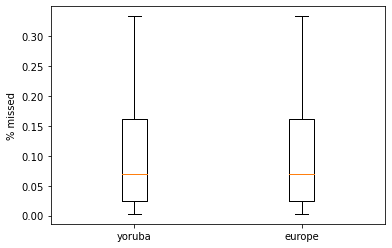

In [11]:
yoruba = df_y['percentage']
europe = yoruba = df_e['percentage']

plt.boxplot([yoruba,europe])
plt.ylabel('% missed')
plt.xticks([1,2],['yoruba','europe'])

Text(0, 0.5, '% miscall for Yoruba')

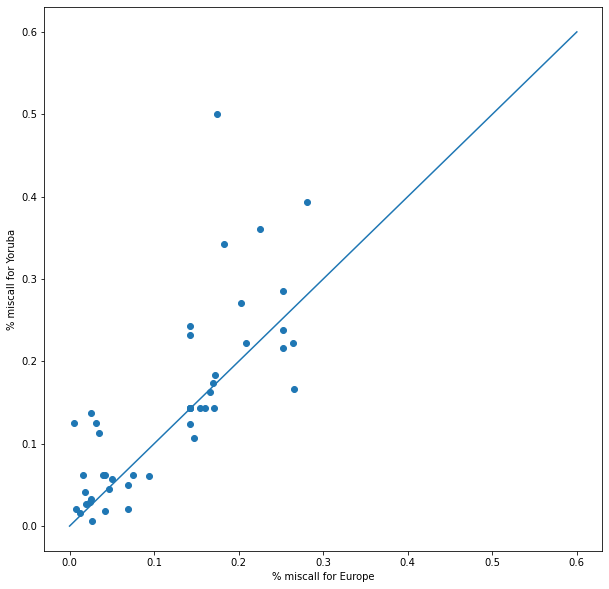

In [26]:
df = pd.merge(df_y, df_e, on='allele')
plt.figure(figsize=(10,10))
plt.scatter(df['percentage_y'],df['percentage_x'])
plt.plot(np.linspace(0, 0.6, 100),np.linspace(0, 0.6, 100))
plt.xlabel('% miscall for Europe')
plt.ylabel('% miscall for Yoruba')